In [18]:
# dependecies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import json
import random
import time
from citipy import citipy
from config import api_key
from datetime import datetime
from os import path, makedirs, remove, rmdir
import datetime
now = datetime.datetime.now()
now

datetime.datetime(2018, 7, 11, 21, 26, 45, 388802)

## Observable Trends

##### Based on the data recollected from 674 random cities in the world (source: openweathermap): 
##### 1) Latitude vs Temperature: we can deduce that at this time of the year, the temperature tends to get colder the farther the distance from the equator, or the higher the latitude (either positive or negative). In addition, the cities with latitudes bewteen +20 and + 40 reported a higher temperature in July of this year. 

##### 2) Latitude vs Humidity: The majority of cities during this time of the year, regardless of the latitude, have a humidity % between 60 and 100.

##### 3) Latitude vs Wind speed (mph): The majority of cities, regardless of the latitude, have a wind speed in miles/hour of 10 or lower.  

#####  4) It also seems that when the temperature is high, the wind speed tends to be low.

In [2]:
# url = "http://api.openweathermap.org/data/2.5/weather?"

#Define Lat and long
lat = np.random.uniform(low=-90.0,high=90.0,size=2000)

#why is it lng and not long? does it matter?
lng = np.random.uniform(low=-180.0,high=180.0,size=2000) 

coordinates = []
for x in range(0,len(lat)):
    coordinates.append((lat[x],lng[x]))
# print(coordinates)

In [6]:
# Generate Cities List
# coordinate_pair in coordinate
cities = []
for coordinate_pair in coordinates:
    lat, lon = coordinate_pair
    cities.append(citipy.nearest_city(lat, lon))
    
# create df
city_df = pd.DataFrame(cities)
city_df["City"] = ""
city_df["Country"] = ""  

for index, row in city_df.iterrows():
    row["City"] = city_df.iloc[index,0].city_name
    row["Country"] = city_df.iloc[index,0].country_code
    
city_df.drop_duplicates(["City","Country"], inplace=True)
city_df.reset_index(inplace = True)

    
del city_df[0]
del city_df["index"]
                
city_df.head()

,City,Country
0,new norfolk,au
1,punta arenas,cl
2,montclair,us
3,cidreira,br
4,hithadhoo,mv


In [7]:
city_df["Latitude"] = ""
city_df["Longitude"] = ""
city_df["Cloudiness %"] = ""
city_df["Humidity %"] = ""
city_df["Temperature (F)"] = ""
city_df["Wind Speed (mph)"] = ""

city_df.columns=["City","Country","Latitude", "Longitude","Temperature (F)","Wind Speed (mph)","Humidity %","Cloudiness %"]
city_df.head()

,City,Country,Latitude,Longitude,Temperature (F),Wind Speed (mph),Humidity %,Cloudiness %
0,new norfolk,au,,,,,,
1,punta arenas,cl,,,,,,
2,montclair,us,,,,,,
3,cidreira,br,,,,,,
4,hithadhoo,mv,,,,,,


In [9]:
# Accessing Data
print("Beginning Data Retrieval")
print("--------------------------------")

# Limiting pull request
start_time = time.time()

# for i, row in city in enumerate(cities):

for index, row in city_df.iterrows():
    
    # Building the URL
    url = "http://api.openweathermap.org/data/2.5/weather?q=%s,%s&units=imperial&appid=%s" % (row['City'],
                                                                                        row['Country'], api_key)
    
    print("Retriving city# " + str(index) + ":" + row["City"] + ", " + row["Country"])
    print(url)
    
    weather = requests.get(url).json()
    
    
    try:
        row["Latitude"] = weather["coord"]["lat"]
        row["Longitude"] = weather["coord"]["lon"]
        row["Cloudiness %"] = weather["clouds"]["all"]
        row["Humidity %"] = weather["main"]["humidity"]
        row["Temperature (F)"] = weather["main"]["temp"]
        row["Wind Speed (mph)"] = weather["wind"]["speed"]
        
    except:
        print("Error with city data. Skipping")
        continue
         
    # pausing to limit requests
    if (index + 1) % 60 == 0:
        run_time = start_time - start_time
        time.sleep(60 - run_time)
        
print("------------------------------------")
print("Data Retrieval Complete")
print("------------------------------------")

city_df.head()

Beginning Data Retrieval
--------------------------------
Retriving city# 0:new norfolk, au
http://api.openweathermap.org/data/2.5/weather?q=new norfolk,au&units=imperial&appid=9f07c20b520c6f77a821a921c2e8ce64
Retriving city# 1:punta arenas, cl
http://api.openweathermap.org/data/2.5/weather?q=punta arenas,cl&units=imperial&appid=9f07c20b520c6f77a821a921c2e8ce64
Retriving city# 2:montclair, us
http://api.openweathermap.org/data/2.5/weather?q=montclair,us&units=imperial&appid=9f07c20b520c6f77a821a921c2e8ce64
Retriving city# 3:cidreira, br
http://api.openweathermap.org/data/2.5/weather?q=cidreira,br&units=imperial&appid=9f07c20b520c6f77a821a921c2e8ce64
Retriving city# 4:hithadhoo, mv
http://api.openweathermap.org/data/2.5/weather?q=hithadhoo,mv&units=imperial&appid=9f07c20b520c6f77a821a921c2e8ce64
Retriving city# 5:susanville, us
http://api.openweathermap.org/data/2.5/weather?q=susanville,us&units=imperial&appid=9f07c20b520c6f77a821a921c2e8ce64
Retriving city# 6:saint-pierre, pm
http://ap

Error with city data. Skipping
Retriving city# 57:georgetown, sh
http://api.openweathermap.org/data/2.5/weather?q=georgetown,sh&units=imperial&appid=9f07c20b520c6f77a821a921c2e8ce64
Retriving city# 58:kayerkan, ru
http://api.openweathermap.org/data/2.5/weather?q=kayerkan,ru&units=imperial&appid=9f07c20b520c6f77a821a921c2e8ce64
Retriving city# 59:soe, id
http://api.openweathermap.org/data/2.5/weather?q=soe,id&units=imperial&appid=9f07c20b520c6f77a821a921c2e8ce64
Retriving city# 60:qasigiannguit, gl
http://api.openweathermap.org/data/2.5/weather?q=qasigiannguit,gl&units=imperial&appid=9f07c20b520c6f77a821a921c2e8ce64
Retriving city# 61:bani, do
http://api.openweathermap.org/data/2.5/weather?q=bani,do&units=imperial&appid=9f07c20b520c6f77a821a921c2e8ce64
Retriving city# 62:hilo, us
http://api.openweathermap.org/data/2.5/weather?q=hilo,us&units=imperial&appid=9f07c20b520c6f77a821a921c2e8ce64
Retriving city# 63:vaini, to
http://api.openweathermap.org/data/2.5/weather?q=vaini,to&units=imperi

Retriving city# 111:victoria, sc
http://api.openweathermap.org/data/2.5/weather?q=victoria,sc&units=imperial&appid=9f07c20b520c6f77a821a921c2e8ce64
Retriving city# 112:north myrtle beach, us
http://api.openweathermap.org/data/2.5/weather?q=north myrtle beach,us&units=imperial&appid=9f07c20b520c6f77a821a921c2e8ce64
Retriving city# 113:zyryanka, ru
http://api.openweathermap.org/data/2.5/weather?q=zyryanka,ru&units=imperial&appid=9f07c20b520c6f77a821a921c2e8ce64
Retriving city# 114:talnakh, ru
http://api.openweathermap.org/data/2.5/weather?q=talnakh,ru&units=imperial&appid=9f07c20b520c6f77a821a921c2e8ce64
Retriving city# 115:tazovskiy, ru
http://api.openweathermap.org/data/2.5/weather?q=tazovskiy,ru&units=imperial&appid=9f07c20b520c6f77a821a921c2e8ce64
Retriving city# 116:berdigestyakh, ru
http://api.openweathermap.org/data/2.5/weather?q=berdigestyakh,ru&units=imperial&appid=9f07c20b520c6f77a821a921c2e8ce64
Retriving city# 117:leningradskiy, ru
http://api.openweathermap.org/data/2.5/weath

Retriving city# 165:meyungs, pw
http://api.openweathermap.org/data/2.5/weather?q=meyungs,pw&units=imperial&appid=9f07c20b520c6f77a821a921c2e8ce64
Error with city data. Skipping
Retriving city# 166:buin, pg
http://api.openweathermap.org/data/2.5/weather?q=buin,pg&units=imperial&appid=9f07c20b520c6f77a821a921c2e8ce64
Error with city data. Skipping
Retriving city# 167:yulara, au
http://api.openweathermap.org/data/2.5/weather?q=yulara,au&units=imperial&appid=9f07c20b520c6f77a821a921c2e8ce64
Retriving city# 168:amparafaravola, mg
http://api.openweathermap.org/data/2.5/weather?q=amparafaravola,mg&units=imperial&appid=9f07c20b520c6f77a821a921c2e8ce64
Retriving city# 169:rochegda, ru
http://api.openweathermap.org/data/2.5/weather?q=rochegda,ru&units=imperial&appid=9f07c20b520c6f77a821a921c2e8ce64
Retriving city# 170:port hedland, au
http://api.openweathermap.org/data/2.5/weather?q=port hedland,au&units=imperial&appid=9f07c20b520c6f77a821a921c2e8ce64
Retriving city# 171:wajima, jp
http://api.op

Retriving city# 220:tres lagoas, br
http://api.openweathermap.org/data/2.5/weather?q=tres lagoas,br&units=imperial&appid=9f07c20b520c6f77a821a921c2e8ce64
Error with city data. Skipping
Retriving city# 221:beatrice, us
http://api.openweathermap.org/data/2.5/weather?q=beatrice,us&units=imperial&appid=9f07c20b520c6f77a821a921c2e8ce64
Retriving city# 222:lagoa, pt
http://api.openweathermap.org/data/2.5/weather?q=lagoa,pt&units=imperial&appid=9f07c20b520c6f77a821a921c2e8ce64
Retriving city# 223:outjo, na
http://api.openweathermap.org/data/2.5/weather?q=outjo,na&units=imperial&appid=9f07c20b520c6f77a821a921c2e8ce64
Retriving city# 224:twentynine palms, us
http://api.openweathermap.org/data/2.5/weather?q=twentynine palms,us&units=imperial&appid=9f07c20b520c6f77a821a921c2e8ce64
Retriving city# 225:tsihombe, mg
http://api.openweathermap.org/data/2.5/weather?q=tsihombe,mg&units=imperial&appid=9f07c20b520c6f77a821a921c2e8ce64
Error with city data. Skipping
Retriving city# 226:port lincoln, au
htt

Retriving city# 276:castrovillari, it
http://api.openweathermap.org/data/2.5/weather?q=castrovillari,it&units=imperial&appid=9f07c20b520c6f77a821a921c2e8ce64
Retriving city# 277:sidney, us
http://api.openweathermap.org/data/2.5/weather?q=sidney,us&units=imperial&appid=9f07c20b520c6f77a821a921c2e8ce64
Retriving city# 278:khushab, pk
http://api.openweathermap.org/data/2.5/weather?q=khushab,pk&units=imperial&appid=9f07c20b520c6f77a821a921c2e8ce64
Retriving city# 279:qaanaaq, gl
http://api.openweathermap.org/data/2.5/weather?q=qaanaaq,gl&units=imperial&appid=9f07c20b520c6f77a821a921c2e8ce64
Retriving city# 280:hovd, mn
http://api.openweathermap.org/data/2.5/weather?q=hovd,mn&units=imperial&appid=9f07c20b520c6f77a821a921c2e8ce64
Retriving city# 281:bambari, cf
http://api.openweathermap.org/data/2.5/weather?q=bambari,cf&units=imperial&appid=9f07c20b520c6f77a821a921c2e8ce64
Retriving city# 282:anchorage, us
http://api.openweathermap.org/data/2.5/weather?q=anchorage,us&units=imperial&appid=9f0

Retriving city# 331:vila velha, br
http://api.openweathermap.org/data/2.5/weather?q=vila velha,br&units=imperial&appid=9f07c20b520c6f77a821a921c2e8ce64
Retriving city# 332:scottsburgh, za
http://api.openweathermap.org/data/2.5/weather?q=scottsburgh,za&units=imperial&appid=9f07c20b520c6f77a821a921c2e8ce64
Error with city data. Skipping
Retriving city# 333:clarence town, bs
http://api.openweathermap.org/data/2.5/weather?q=clarence town,bs&units=imperial&appid=9f07c20b520c6f77a821a921c2e8ce64
Retriving city# 334:necochea, ar
http://api.openweathermap.org/data/2.5/weather?q=necochea,ar&units=imperial&appid=9f07c20b520c6f77a821a921c2e8ce64
Retriving city# 335:sakaiminato, jp
http://api.openweathermap.org/data/2.5/weather?q=sakaiminato,jp&units=imperial&appid=9f07c20b520c6f77a821a921c2e8ce64
Retriving city# 336:ranong, th
http://api.openweathermap.org/data/2.5/weather?q=ranong,th&units=imperial&appid=9f07c20b520c6f77a821a921c2e8ce64
Retriving city# 337:viedma, ar
http://api.openweathermap.or

Retriving city# 387:kargasok, ru
http://api.openweathermap.org/data/2.5/weather?q=kargasok,ru&units=imperial&appid=9f07c20b520c6f77a821a921c2e8ce64
Retriving city# 388:beloha, mg
http://api.openweathermap.org/data/2.5/weather?q=beloha,mg&units=imperial&appid=9f07c20b520c6f77a821a921c2e8ce64
Retriving city# 389:kodiak, us
http://api.openweathermap.org/data/2.5/weather?q=kodiak,us&units=imperial&appid=9f07c20b520c6f77a821a921c2e8ce64
Retriving city# 390:cesky krumlov, cz
http://api.openweathermap.org/data/2.5/weather?q=cesky krumlov,cz&units=imperial&appid=9f07c20b520c6f77a821a921c2e8ce64
Retriving city# 391:kysyl-syr, ru
http://api.openweathermap.org/data/2.5/weather?q=kysyl-syr,ru&units=imperial&appid=9f07c20b520c6f77a821a921c2e8ce64
Retriving city# 392:road town, vg
http://api.openweathermap.org/data/2.5/weather?q=road town,vg&units=imperial&appid=9f07c20b520c6f77a821a921c2e8ce64
Retriving city# 393:terme, tr
http://api.openweathermap.org/data/2.5/weather?q=terme,tr&units=imperial&app

Retriving city# 442:saedinenie, bg
http://api.openweathermap.org/data/2.5/weather?q=saedinenie,bg&units=imperial&appid=9f07c20b520c6f77a821a921c2e8ce64
Retriving city# 443:laguna, br
http://api.openweathermap.org/data/2.5/weather?q=laguna,br&units=imperial&appid=9f07c20b520c6f77a821a921c2e8ce64
Error with city data. Skipping
Retriving city# 444:kahama, tz
http://api.openweathermap.org/data/2.5/weather?q=kahama,tz&units=imperial&appid=9f07c20b520c6f77a821a921c2e8ce64
Retriving city# 445:nechi, co
http://api.openweathermap.org/data/2.5/weather?q=nechi,co&units=imperial&appid=9f07c20b520c6f77a821a921c2e8ce64
Retriving city# 446:taltal, cl
http://api.openweathermap.org/data/2.5/weather?q=taltal,cl&units=imperial&appid=9f07c20b520c6f77a821a921c2e8ce64
Retriving city# 447:ormara, pk
http://api.openweathermap.org/data/2.5/weather?q=ormara,pk&units=imperial&appid=9f07c20b520c6f77a821a921c2e8ce64
Retriving city# 448:plouzane, fr
http://api.openweathermap.org/data/2.5/weather?q=plouzane,fr&units

Retriving city# 498:panguna, pg
http://api.openweathermap.org/data/2.5/weather?q=panguna,pg&units=imperial&appid=9f07c20b520c6f77a821a921c2e8ce64
Retriving city# 499:maracacume, br
http://api.openweathermap.org/data/2.5/weather?q=maracacume,br&units=imperial&appid=9f07c20b520c6f77a821a921c2e8ce64
Retriving city# 500:khani, ru
http://api.openweathermap.org/data/2.5/weather?q=khani,ru&units=imperial&appid=9f07c20b520c6f77a821a921c2e8ce64
Error with city data. Skipping
Retriving city# 501:grand gaube, mu
http://api.openweathermap.org/data/2.5/weather?q=grand gaube,mu&units=imperial&appid=9f07c20b520c6f77a821a921c2e8ce64
Retriving city# 502:caravelas, br
http://api.openweathermap.org/data/2.5/weather?q=caravelas,br&units=imperial&appid=9f07c20b520c6f77a821a921c2e8ce64
Retriving city# 503:hearst, ca
http://api.openweathermap.org/data/2.5/weather?q=hearst,ca&units=imperial&appid=9f07c20b520c6f77a821a921c2e8ce64
Retriving city# 504:paita, pe
http://api.openweathermap.org/data/2.5/weather?q=pa

Retriving city# 553:ostersund, se
http://api.openweathermap.org/data/2.5/weather?q=ostersund,se&units=imperial&appid=9f07c20b520c6f77a821a921c2e8ce64
Retriving city# 554:santa helena, br
http://api.openweathermap.org/data/2.5/weather?q=santa helena,br&units=imperial&appid=9f07c20b520c6f77a821a921c2e8ce64
Retriving city# 555:dolores, ar
http://api.openweathermap.org/data/2.5/weather?q=dolores,ar&units=imperial&appid=9f07c20b520c6f77a821a921c2e8ce64
Retriving city# 556:maningrida, au
http://api.openweathermap.org/data/2.5/weather?q=maningrida,au&units=imperial&appid=9f07c20b520c6f77a821a921c2e8ce64
Retriving city# 557:hunfeld, de
http://api.openweathermap.org/data/2.5/weather?q=hunfeld,de&units=imperial&appid=9f07c20b520c6f77a821a921c2e8ce64
Retriving city# 558:lithakia, gr
http://api.openweathermap.org/data/2.5/weather?q=lithakia,gr&units=imperial&appid=9f07c20b520c6f77a821a921c2e8ce64
Retriving city# 559:ola, ru
http://api.openweathermap.org/data/2.5/weather?q=ola,ru&units=imperial&app

Retriving city# 607:palana, ru
http://api.openweathermap.org/data/2.5/weather?q=palana,ru&units=imperial&appid=9f07c20b520c6f77a821a921c2e8ce64
Retriving city# 608:dingzhou, cn
http://api.openweathermap.org/data/2.5/weather?q=dingzhou,cn&units=imperial&appid=9f07c20b520c6f77a821a921c2e8ce64
Retriving city# 609:grindavik, is
http://api.openweathermap.org/data/2.5/weather?q=grindavik,is&units=imperial&appid=9f07c20b520c6f77a821a921c2e8ce64
Retriving city# 610:sola, vu
http://api.openweathermap.org/data/2.5/weather?q=sola,vu&units=imperial&appid=9f07c20b520c6f77a821a921c2e8ce64
Retriving city# 611:tilichiki, ru
http://api.openweathermap.org/data/2.5/weather?q=tilichiki,ru&units=imperial&appid=9f07c20b520c6f77a821a921c2e8ce64
Retriving city# 612:karaul, ru
http://api.openweathermap.org/data/2.5/weather?q=karaul,ru&units=imperial&appid=9f07c20b520c6f77a821a921c2e8ce64
Error with city data. Skipping
Retriving city# 613:ozinki, ru
http://api.openweathermap.org/data/2.5/weather?q=ozinki,ru&uni

Retriving city# 663:krasnoarmeysk, kz
http://api.openweathermap.org/data/2.5/weather?q=krasnoarmeysk,kz&units=imperial&appid=9f07c20b520c6f77a821a921c2e8ce64
Error with city data. Skipping
Retriving city# 664:urengoy, ru
http://api.openweathermap.org/data/2.5/weather?q=urengoy,ru&units=imperial&appid=9f07c20b520c6f77a821a921c2e8ce64
Retriving city# 665:celestun, mx
http://api.openweathermap.org/data/2.5/weather?q=celestun,mx&units=imperial&appid=9f07c20b520c6f77a821a921c2e8ce64
Retriving city# 666:paka, my
http://api.openweathermap.org/data/2.5/weather?q=paka,my&units=imperial&appid=9f07c20b520c6f77a821a921c2e8ce64
Retriving city# 667:xadani, mx
http://api.openweathermap.org/data/2.5/weather?q=xadani,mx&units=imperial&appid=9f07c20b520c6f77a821a921c2e8ce64
Error with city data. Skipping
Retriving city# 668:borogontsy, ru
http://api.openweathermap.org/data/2.5/weather?q=borogontsy,ru&units=imperial&appid=9f07c20b520c6f77a821a921c2e8ce64
Retriving city# 669:xihe, cn
http://api.openweathe

Retriving city# 718:egvekinot, ru
http://api.openweathermap.org/data/2.5/weather?q=egvekinot,ru&units=imperial&appid=9f07c20b520c6f77a821a921c2e8ce64
Retriving city# 719:oros, br
http://api.openweathermap.org/data/2.5/weather?q=oros,br&units=imperial&appid=9f07c20b520c6f77a821a921c2e8ce64
Retriving city# 720:angouleme, fr
http://api.openweathermap.org/data/2.5/weather?q=angouleme,fr&units=imperial&appid=9f07c20b520c6f77a821a921c2e8ce64
Retriving city# 721:kenai, us
http://api.openweathermap.org/data/2.5/weather?q=kenai,us&units=imperial&appid=9f07c20b520c6f77a821a921c2e8ce64
Retriving city# 722:qesarya, il
http://api.openweathermap.org/data/2.5/weather?q=qesarya,il&units=imperial&appid=9f07c20b520c6f77a821a921c2e8ce64
Retriving city# 723:tupik, ru
http://api.openweathermap.org/data/2.5/weather?q=tupik,ru&units=imperial&appid=9f07c20b520c6f77a821a921c2e8ce64
Retriving city# 724:hornepayne, ca
http://api.openweathermap.org/data/2.5/weather?q=hornepayne,ca&units=imperial&appid=9f07c20b520

,City,Country,Latitude,Longitude,Temperature (F),Wind Speed (mph),Humidity %,Cloudiness %
0,new norfolk,au,-42.78,147.06,44.6,10.29,87,75
1,punta arenas,cl,-53.16,-70.91,33.8,10.29,100,75
2,montclair,us,34.08,-117.69,85.41,18.34,33,75
3,cidreira,br,-30.17,-50.22,47.06,3.83,91,0
4,hithadhoo,mv,-0.6,73.08,81.71,6.4,100,68


In [13]:
#Check if output folder exist, create if it doesn't exists!

filePath = 'Weather_analysis'
if not path.exists(filePath):
    makedirs(filePath)

# Save the result to a csv file
city_df.to_csv("Weather_analysis/Weather_analysis.csv", index=False)

In [33]:
# Count number of values in the dataframe

# city_df.count()
# city_df.dtypes

# Converting object types to float types
city_df["Latitude"] = pd.to_numeric(city_df["Latitude"])
city_df["Longitude"] = pd.to_numeric(city_df["Longitude"])
city_df["Temperature (F)"] = pd.to_numeric(city_df["Temperature (F)"])
city_df["Wind Speed (mph)"] = pd.to_numeric(city_df["Wind Speed (mph)"])
city_df["Humidity %"] = pd.to_numeric(city_df["Humidity %"])
city_df["Cloudiness %"] = pd.to_numeric(city_df["Cloudiness %"])


city_df.dtypes
city_df.count()

City                768
Country             768
Latitude            674
Longitude           674
Temperature (F)     674
Wind Speed (mph)    674
Humidity %          674
Cloudiness %        674
dtype: int64

In [38]:
# Drop NA values and create a new dataframe
new_city_df = city_df.dropna(how='any') 
new_city_df.count()

City                674
Country             674
Latitude            674
Longitude           674
Temperature (F)     674
Wind Speed (mph)    674
Humidity %          674
Cloudiness %        674
dtype: int64

In [ ]:
# city_df_1 = pd.read_csv()

In [39]:
# Creating a function to set the properties of the graph
def plot_graph(x_label,y_label,x_limits,save_file_name):
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.xlim(x_limits)
    plt.title("%s vs %s (%s/%s/%s)"%(x_label,y_label,now.month,now.day,now.year),fontsize=14)
    plt.grid(True)
    plt.savefig(save_file_name)
    plt.show()

# Latitude vs Temperature(F)

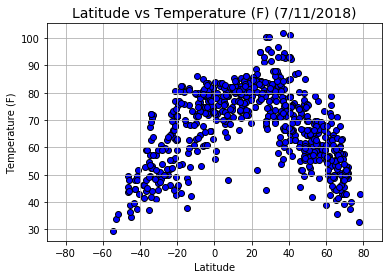

In [42]:
# Latitude vs Temperature(F)
plt.scatter(x=new_city_df["Latitude"],y=new_city_df["Temperature (F)"],facecolors="blue",edgecolors="black")  
plot_graph("Latitude","Temperature (F)",[-90,90],"Weather_analysis/City Latitude vs Temperature.png")

# Latitude vs Humidity% 

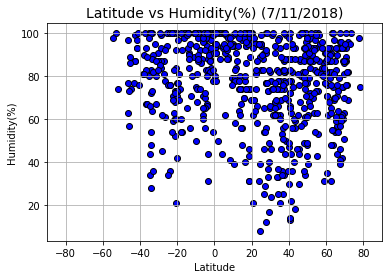

In [43]:
# # Latitude vs Humidity in % 
plt.scatter(x=new_city_df["Latitude"],y=new_city_df["Humidity %"],facecolors="blue",edgecolors="black")
plot_graph("Latitude","Humidity(%)",[-90,90],"Weather_analysis/City Latitude vs Humidity.png")

# Latitude vs. Cloudiness %

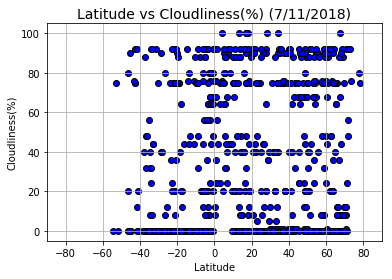

In [44]:
# Latitude vs Cloudliness in %
plt.scatter(x=new_city_df["Latitude"],y=new_city_df["Cloudiness %"],facecolors="blue",edgecolors="black")
plot_graph("Latitude","Cloudliness(%)",[-90,90],"Weather_analysis/City Latitude vs Cloudliness.png")

# Latitude vs Wind Speed in (mph)

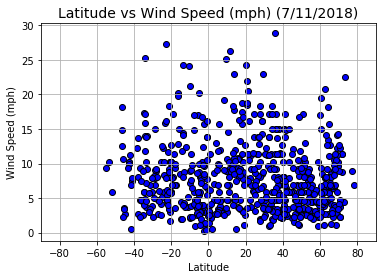

In [45]:
# Latitude vs Wind Speed in (mph)
plt.scatter(x=city_df["Latitude"],y=city_df["Wind Speed (mph)"],facecolors="blue",edgecolors="black")
plot_graph("Latitude","Wind Speed (mph)",[-90,90],"Weather_analysis/City Latitude vs Wind speed.png")